# Estadística Inferencial

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

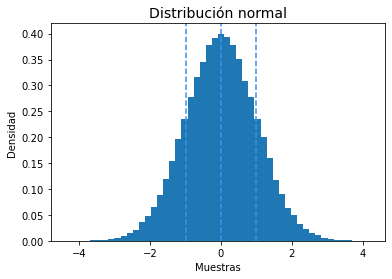

In [35]:
# Cómo simular una distribución normal

#numpy.random.normal despliega números aleatorios ajustados para una distribución normal
# los parámetros son (centro de la distribución, la desviaciń estandar, tamaño)
rand = np.random.normal(0,1,size=100000)

#Graficamos
fig, ax = plt.subplots()
plt.hist(rand, bins=50, density=True)
plt.title('Distribución normal', size=14)
plt.xlabel('Muestras')
plt.ylabel('Densidad')
plt.axvline(0, color='#3793ef', linestyle='--')
plt.axvline(np.std(rand), color='#3793ef', linestyle='--')
plt.axvline(-1*np.std(rand), color='#3793ef', linestyle='--')
plt.show()


## Funciones de muestreo

In [39]:
econdata = pd.read_csv('econdata.csv')
#Economía y turismo
econdata.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


### 1) Muestreo aleatorio simple:

In [40]:
# Elige 8 datos aleatorios de econdata, esto con el comando sample
aleat_8 = econdata.sample(n=8)
aleat_8

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
98,98,"19.4409812032,-99.1401537957","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_069_08,Cuautémoc,B,Hotel,"Riva Palacio, S.A. DE C.V."
173,173,"19.4314834886,-99.1259717478","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",006_026_38,Cuautémoc,A,Hotel,Soledad
105,105,"19.4298675871,-99.1370239721","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_042_04,Cuautémoc,A,Hotel,Isabel
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
70,70,"19.43712772,-99.1378899","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_090_02,Cuautémoc,A,Hotel,Congreso
21,21,"19.43614459,-99.13945267","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_098_01,Cuautémoc,A,Museo,Telégrafo
64,64,"19.44281242,-99.13974599","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",003_053_01,Cuautémoc,B,Hotel,San Martin


In [41]:
# Eligiendo el 25% de la tabla

prop_25 = econdata.sample(frac=.25)
prop_25.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
30,30,"19.427530818,-99.1479200065","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_068_13,Cuautémoc,B,Hotel,Villa Pal
57,57,"19.4303913751,-99.1465372648","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_048_10,Cuautémoc,B,Hotel,Conde
77,77,"19.4254536359,-99.1226996335","{""type"": ""Polygon"", ""coordinates"": [[[-99.1233...",323_101_01,Venustiano Carranza,B,Mercado,La Merced Nave Menor
145,145,"19.4340221684,-99.1358187396","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_11,Cuautémoc,A,Hotel,Rioja
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena


### 2)Muestreo sistemático

In [59]:
#Toma datos de periodo de 3 en 3
def systematic_sampling(econdata, step):
    indexes = np.arange(0,len(econdata),step=step)
    systematic_sample = econdata.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(econdata,3)
systematic_sample.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz


In [58]:
# Los primeros 100 valores que van de 10 en 10b
def systematic_sampling(econdata, step):
    indexes = np.arange(0,100,step=step)
    systematic_sample = econdata.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(econdata,2)
systematic_sample.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
8,8,"19.4343402009,-99.148212127","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_17,Cuautémoc,B,Hotel,Ambassador


In [57]:
econdata.iloc[:100:2].head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
8,8,"19.4343402009,-99.148212127","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_17,Cuautémoc,B,Hotel,Ambassador


### 3) Muestreo estratificado


In [76]:
# Se crean dichas categorías a partor de la delegación y el tipo, esta información se almacena
# En la columna estratificado
econdata['estratificado'] = econdata['delegacion'] + ',' + econdata['tipo']
(econdata['estratificado'].value_counts()/len(econdata)).sort_values(ascending=False)

Cuautémoc,Hotel                0.643478
Cuautémoc,Museo                0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: estratificado, dtype: float64

Nuestros datos dicen que la proporción es la siguiente:
- Cuautémoc,Hotel                0.643478
- Cuautémoc,Museo                0.156522
- Venustiano Carranza,Hotel      0.078261
- Cuauhtémoc,Mercado             0.073913
- Venustiano Carranza,Mercado    0.047826

Pero para nuestro muestreo definimos la siguiente proporción
- Cuautémoc, Hotel: 0.5,
- Cuautémoc, Museo: 0.2,
- Venustiano Carranza, Hotel: 0.1,
- Cuauhtémoc, Mercado: 0.1,
- Venustiano Carranza, Mercado: 0.1

Para crear dicha proporción a partir de los datos originales se utiliza la siguiente función que encuentra el número de muestras necesarias de cada categoría.

In [77]:
# Hacer un sampleo simple dentro de dicha categoría y luego juntar esa muestra
def data_estratificada(econdata, nombres_columnas_estrat, valores_estrat, prop_estrat, random_state=None):
    
    df_estrat = pd.DataFrame(columns = econdata.columns) # Creamos un data frame vacío con los nombres de las columnas de econdata

    pos = -1
    for i in range(len(valores_estrat)): # iteración sobre los valores estratificados
        pos += 1
        if pos == len(valores_estrat) - 1: 
            ratio_len = len(econdata) - len(df_estrat) # si es la iteración final calcula el número de valores de salida tenga el mismo número de filas que de entrada
        else:
            ratio_len = int(len(econdata) * prop_estrat[i]) # calcula el número de filas según la proporción deseada

        df_filtrado = econdata[econdata[nombres_columnas_estrat] ==valores_estrat[i]] # filtra los datos de origen según los valores seleccionados en la estratificación de datos
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state) # haz un sample de los datos filtrados usando la ratio que hemos calculado
        
        df_estrat = pd.concat([df_estrat, df_temp]) # junta las tablas de sample con la estratificada para producir el resultado final
        
    return df_estrat # Return the stratified, re-sampled data  

In [69]:
valores_estrat = ['Cuautémoc,Hotel', 'Cuautémoc,Museo', 'Venustiano Carranza,Hotel', 'Cuauhtémoc,Mercado','Venustiano Carranza,Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1,0.1]
df_estrat = data_estratificada(econdata, 'estratificado', valores_estrat, prop_estrat, random_state=42)
df_estrat.head()


,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
164,164,"19.4388741511,-99.1413308257","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_113_03,Cuautémoc,B,Hotel,Dos Naciones,"Cuautémoc,Hotel"
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar,"Cuautémoc,Hotel"
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico,"Cuautémoc,Hotel"
168,168,"19.4349726565,-99.147766133","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_23,Cuautémoc,B,Hotel,One Alameda,"Cuautémoc,Hotel"
113,113,"19.43374405,-99.13550135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_13,Cuautémoc,A,Hotel,San Antonio,"Cuautémoc,Hotel"


In [75]:
# forma más sencilla
econdata['strat'] = econdata['delegacion'] + " - " + econdata['tipo']

def stratified_sample(econdata, category, size):
  strat_values = econdata[category].unique()
  strat_props = (econdata[category].value_counts() / len(econdata))

  strat_sample = pd.DataFrame(columns = econdata.columns)

  for value in strat_values:
    strat_sample = pd.concat([strat_sample, econdata[(econdata[category] == value)].sample(n = round(strat_props[value]*size)) ])
  
  return strat_sample

strat_sample = stratified_sample(econdata, 'strat', 40)
strat_sample.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado,strat
135,135,"19.4300009578,-99.1430773295","{""type"": ""Polygon"", ""coordinates"": [[[-99.1431...",002_045_01,Cuauhtémoc,B,Mercado,"Centro Artesanal ""San Juan""","Cuauhtémoc,Mercado",Cuauhtémoc - Mercado
129,129,NaN,NaN,005_125_01,Cuauhtémoc,A,Mercado,Abelardo,"Cuauhtémoc,Mercado",Cuauhtémoc - Mercado
38,38,"19.4439555857,-99.1345196425","{""type"": ""Polygon"", ""coordinates"": [[[-99.1351...",004_106_01,Cuauhtémoc,B,Mercado,La Lagunilla Comestibles,"Cuauhtémoc,Mercado",Cuauhtémoc - Mercado
206,206,"19.4298259264,-99.1386360482","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_047_36,Cuautémoc,A,Museo,Instituto Cultural México-Israel,"Cuautémoc,Museo",Cuautémoc - Museo
228,228,"19.4406567734,-99.1394531646","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_069_01,Cuautémoc,B,Museo,Tequila y Mescal,"Cuautémoc,Museo",Cuautémoc - Museo


- Separamos los datos por categorías (valores estratificados)
- Definimos las categorías que quieres en tu muestreo y su proporción
- Tomar tantos datos como se necesiten de cada categoría para llegar a la proporción deseada.
- Juntar esas muestras de cada categoría para tu muestreo final.



In [79]:
(df_estrat['estratificado'].value_counts()/len(df_estrat)).sort_values(ascending=False)
# con esto ya se tiene  una muestra en las proporciones que deseábamos en un principio.

Cuautémoc,Hotel                0.5
Cuautémoc,Museo                0.2
Venustiano Carranza,Hotel      0.1
Cuauhtémoc,Mercado             0.1
Venustiano Carranza,Mercado    0.1
Name: estratificado, dtype: float64

# Desviación estandar y varianza


In [85]:
edades = np.array([28,24,25,23,38,52])
media = edades.mean()
desv = edades.std()
var = edades.var()
print(f'media= {media}\ndesviación estandar={desv}\nVarianza={var}')

media= 31.666666666666668
desviación estandar=10.370899457402697
Varianza=107.55555555555554


In [118]:
def std_muestral(edades):
    var = 0
    for edad in edades:
        var = var + (edad - media)**2
    var = var/(len(edades)-1)
    var = np.sqrt(var)
    return var

In [124]:
print(f'desviación muestral = {std_muestral(edades)}')
print(f'varianza muestral = {std_muestral(edades)**2}')

desviación muestral = 11.360751148875089
varianza muestral = 129.06666666666666


In [152]:
## Reto

poblacion = np.array([7,10,12,13,16,9,8,12,8,6,
                     16,23,11,17,20,21,25,30,31,
                     33,37,39,27,36,40,43,41,45])
media = sum(poblacion)/len(poblacion)

def std(poblacion):
    var = 0
    for value in poblacion:
        var = var + (value - media)**2
    var = var/(len(poblacion))
    var = np.sqrt(var)
    return var

print(f'media = {media:.2f}\nmedia con numpy = {np.mean(poblacion):.2f}')
print(f'Desviación estandar = {std(poblacion):.2f}\nDesviación con numpy ={np.std(poblacion):.2f}')
print(f'Varianza = {std(poblacion)**2:.2f}\nVarianza con numpy ={np.var(poblacion):.2f}')



media = 22.71
media con numpy = 22.71
Desviación estandar = 12.45
Desviación con numpy =12.45
Varianza = 155.06
Varianza con numpy =155.06


In [140]:
muestra = poblacion[:20]
media = sum(muestra)/len(muestra)

def std(poblacion):
    var = 0
    for value in poblacion:
        var = var + (value - media)**2
    var = var/(len(poblacion)-1)
    var = np.sqrt(var)
    return var

print(f'Media muestral = {media:.2f}\nDesviación estandar muestral = {std(muestra):.2f}\nVarianza muestral = {std(muestra)**2:.2f}')

Media muestral = 16.40
Desviación estandar muestral = 8.39
Varianza muestral = 70.46


# Varianza y desviación estándar muestral

In [20]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length','petal-width','class']
iris = pd.read_csv(url, names=names)

In [143]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


https://static.platzi.com/media/public/uploads/petalo-sepalo_0ee5ed06-dbab-456d-a755-a584d0ecb5b4.jpeg

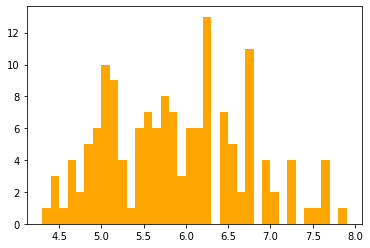

In [146]:
plt.hist(iris['sepal-length'], color='orange', bins=int(180/5));

/home/jeffersonrl/anaconda3/envs/jeff3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


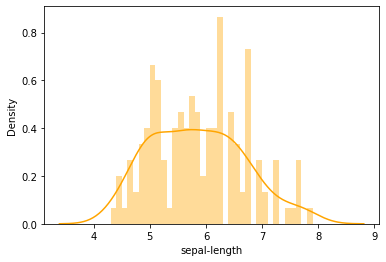

In [148]:
sns.distplot(iris['sepal-length'],hist=True,kde=True,bins=int(180/5),color='orange');

## Calculo de la desviación estandar y la varianza

In [149]:
iris['sepal-length'].var()

0.6856935123042505

In [150]:
iris['sepal-length'].std()

0.8280661279778629

In [153]:
iris['sepal-length'].mean()

5.843333333333335

El valor promedio de longitud de sépalo es de 5.84, con este indicador se ve que la desviación estandar de 0.82 y una varianza de 0.68 si son valores significativos, porque es aprox un 20% del valor promedio. 
Si tuvieramos una desviación que sea menor a un 1% por ejemplo, podríamos decir que es una buena distribución de nuestros datos y que está unida y no tenemos parámetros tan separados.

In [155]:
### Creaión de muestra mediante el muestreo aleatorio simple

muestra = iris.sample(frac=0.5)
muestra.head()

,sepal-length,sepal-width,petal-length,petal-width,class
67,5.8,2.7,4.1,1.0,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor


al usar std() en pandas, la división la hace por defecto con N-1 (como hay que calcularla para muestras), esto se determina con el parámetro ddof (por defecto es 1), que significa Delta Degrees of Freedom. Pero se puede cambiar escogiendo otro numero entero, y en ese caso quedaría N - ddof

In [158]:
## Calculo de la varianza
muestra['sepal-length'].var()

0.6448576576576576

In [162]:
## Calculo desviación estandar
muestra['sepal-length'].std()

0.8030302968491647

In [160]:
## Calculo del valor promedio
muestra['sepal-length'].mean()

5.830666666666665

Al extraer una muestra aleatoria de la población y luego otra y luego otra, tendremos diferentes estadísticos descriptivos de estas muestras, ya que no escogemos los mismos elementos en cada una de las muestras.

Esto no significa que la muestra no sea representativa. En este caso, es mejor pensar en los estadísticos no como un solo valor puntual, sino como un rango de valores dentro de un intervalo de confianza.

# Calculo de intervalo de confianza en Python

In [14]:
# Teniendo una distribución propia
np.random.seed(20)
var1 = np.random.randint(0,10,10)     #Días de vacaciones
var2 = var1+np.random.normal(0,1,10)  #Dinero gastado

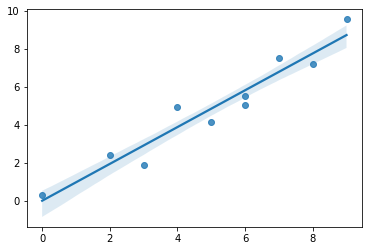

In [15]:
## Visualización de resultados con intervalo de confianza del 80%

grafico = sns.regplot(x=var1,y=var2, ci=80);
#A más días de vacaciones, más dinero gastamos.

In [16]:
#uniendo las dos variables

tuple = list(zip(var1,var2))
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [18]:
tabla = pd.DataFrame(tuple, columns=['Días de vacaciones','Dinero gastado'])
tabla

,Días de vacaciones,Dinero gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [19]:
# Calculando los intervalos de confianza en un 95%

st.t.interval(alpha=0.95, df=len(tabla)-1,loc=np.mean(tabla),scale=st.sem(tabla))

/home/jeffersonrl/anaconda3/envs/jeff3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

# Pruebas de hipótesis: t de Student

In [21]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Tipos de pruebas

a) Distribución t de student

$$
StandarError = SE = \frac{\sigma}{\sqrt{N}}
$$

In [23]:
se_length = iris.std()['sepal-length']/np.sqrt(10)
se_width = iris.std()['sepal-width']/np.sqrt(10)

/tmp/ipykernel_6421/1770136749.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_length = iris.std()['sepal-length']/np.sqrt(10)
/tmp/ipykernel_6421/1770136749.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_width = iris.std()['sepal-width']/np.sqrt(10)


Standar error desviation

$$
SED=\sqrt{\frac{\sigma_1^2}{N_1}+\frac{\sigma_2^2}{N_2}}
$$

In [25]:
sed = np.sqrt((se_length**2)+(se_width**2))

$$
t=\frac{\bar{x}_1-\bar{x}_2}{SED}
$$

$$
t=\frac{(x_1-x_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}
$$

In [27]:
t_stat = (iris['sepal-length'].mean()-iris['sepal-width']).mean()/sed
t_stat

9.436693738890332

In [29]:
p = ttest_ind(iris['sepal-length'],iris['sepal-width'])
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

Como t_stat = 943 es muchísimo más grande que pvalue se rechaza la hipótesis de que una distribución y la otra son similares.

## Prueba de hipótesis: Pearson y ANOVA

b) Correlación y coeficiente de __Pearson__

In [31]:
iris['sepal-length'].corr(iris['sepal-width'])

-0.10936924995064937

In [32]:
st.pearsonr(iris['sepal-length'],iris['sepal-width'])

(-0.10936924995064934, 0.1827652152713699)

vemos que el rango está alrededor de 0, por lo que no podemos decir que una variable se mueva con la otra, por lo que son variables separadas e independientes.

c.) Análisis de la varianza __(ANOVA)__

In [33]:
f_oneway(iris['sepal-length'],iris['sepal-width'])

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

El resultado de ANOVA es 1335 y el pvalue es muy bajo, vemos que es inferior al 0.05 que es nuestro valor de significancia a comparar. Como Pvalue es menor, se rechaza la hipótesis nula de que las medias entre ambas varianzas sean similares. Se puede concluir, entonces que sí hay diferencias y no es posible quedarse con la hipótesis nula.

### Reto, prueba de hipótesis utilizando t de student, coeficiente de Pearson y Análisis de la varianza (ANOVA)

## t test

In [35]:
se_sepal = iris['sepal-length'].std()/np.sqrt(10)
se_petal = iris['petal-length'].std()/np.sqrt(10)
sed = np.sqrt((se_sepal**2)+(se_petal**2))

In [36]:
t_stat = (iris['sepal-length'].mean()-iris['petal-length']).mean()/sed
t_stat

3.382277516720452

In [37]:
p = ttest_ind(iris['sepal-length'],iris['petal-length'])
p

Ttest_indResult(statistic=13.099504494510061, pvalue=2.8297338637366177e-31)

__Resultados__

Los resultados del t test nos indican 

### coeficiente de Pearson

In [39]:
iris['sepal-length'].corr(iris['petal-length'])

0.8717541573048718

In [43]:
st.pearsonr(iris['sepal-length'],iris['petal-length'])
# st.pearsonr(x,y) retorna dos valores (r,pvalue)
# r corresponde al coeficiente de correlación 
# p value es el pvalue de nuestra hipótesis pero este es para una prueba de dos colas

(0.8717541573048713, 1.0384540627941062e-47)

De esto se puede concluir que se puede rechazar la hipótesis nula debido a que todos los p-values de las pruebas son menores a un alpha de 0.05 pero existe una correlación positiva fuerte entre las variables.

### Análisis de la varianza NOVA

In [42]:
f_oneway(iris['sepal-length'],iris['petal-length'])

F_onewayResult(statistic=171.59701800168915, pvalue=2.829733863736772e-31)

__Anova__ nos indica si las medias de dos distribuciones son similares o no, mientras que pearson nos muestra la correlación. De ser así, los resultados serían correctos ya que existe una media

In [44]:
print(iris['sepal-length'].mean())
print(iris['petal-length'].mean())

5.843333333333335
3.7586666666666693


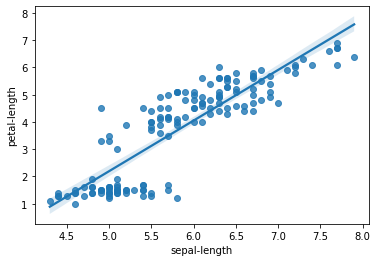

In [47]:
# Su correlación
sns.regplot(data=iris,x='sepal-length', y='petal-length');

# Bootstrapping en python

In [50]:
data = np.random.normal(loc=34,size=10000)   #Población de 10000 personas con media de 34 años
np.mean(data)

33.992428112889556

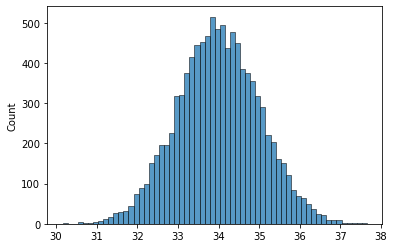

In [57]:
sns.histplot(data);

In [59]:
random.sample(data.tolist(),5)    #Toma de manera aleatoria 5 datos de data
                                  #Y los convierte en una lista de 5 elementos.

[34.35090992047028,
 32.487662464564345,
 34.252363878703655,
 33.16333887758725,
 35.43881227033209]

In [53]:
# bootstrapping para calcular el promedio de edades
# remuestreo
promedio = []

for i in range(40):
    #Lista que tiene 5 datos random de data
    muestra = random.sample(data.tolist(),5)
    #Media de esos 5 datos
    prom = np.mean(muestra)
    #guarda la media en una lista
    promedio.append(prom)

In [60]:
#Calculamos la media de las medias del bootscrapping
np.mean(promedio)

34.06549435802695

Esta técnica de remuestreo está ayudando a no sesgar los resultados, estamos evitando algo llamado el "overfiting" o sobre ajuste, que sucede cuando la estimación es demasiado cercana al dato real, pero esto sucede cuando tenemos pocos datos. 

# Validación cruzada

In [3]:
df = pd.read_csv('cancerdata.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = df.iloc[:,2:] #todo, desde la columna 2 en adelante
Y = df.iloc[:,1]  #todo, solo de la columna 1

# Recordemos que iloc necesita dos parámetros
# iloc[cuáto quieres de las columnas(las filas), cuántas columnas quieres]

In [5]:
# Conteo de cancer entre maligno y benigno
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

División entre modelos que no vamos a tocar y uno que vamos a entrenar con validación cruzada

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 4)
# El random state define el nivel de precisión
modelo = DecisionTreeClassifier()
modelo.fit(X_train, Y_train)
resultado = modelo.score(X_test, Y_test)
print(resultado)

0.9005847953216374


In [8]:
# Validación cruzada k fold

from sklearn.model_selection import KFold

modelo = DecisionTreeClassifier()
kfold_validacion = KFold(10)


In [9]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.94736842 0.9122807  0.87719298 0.94736842 0.92982456 0.96491228
 0.9122807  0.96491228 0.9122807  0.92857143]


0.9296992481203008

### ¿Qué pasa cuando hay clases desbalanceadas? ¿Cómo saber si las hay? y cómo solucionarlo

Para ello es primero ver cómo están distribuidas las clases

In [10]:
#Vemos por groupby como está el diagnosis de cancer

df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [11]:
#¿y esto a cuánto corresponde? 
porcentaje1 = (df.groupby('diagnosis').size()[0]/len(df['diagnosis']))*100
porcentaje2 = (df.groupby('diagnosis').size()[1]/len(df['diagnosis']))*100

print(f'Benignos = {porcentaje1:.3f}%\nMalignos = {porcentaje2:.3f}%')

Benignos = 62.742%
Malignos = 37.258%


Como se observa, una clase tiene 62% de los datos y la otra el 37%, por lo tanto si usamos simplemente el calculo del accuracy (precisión) que viene por defecto en el modelo.score o en el cross_val_score obtendremos un resultado erróneo, entonces ¿cómo medimos el verdadero score de nuestro modelo?
La respuesta es utilizando la métrica cohen_kappa_score la cual penaliza cuando las clases están desproporcionadas


Por lo que ahora se debe calcular el verdadero score

In [23]:
# Métrica para clases desbalanceadas

from sklearn.metrics import cohen_kappa_score

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=4)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediccion = model.predict(X_test)
cohen = cohen_kappa_score(prediccion,y_test)
print("Verdadero resultado = ", np.round(cohen*100,2),"%")

Verdadero resultado =  77.02 %


Se observa que el score da un aproximado de 78% muy diferente al 90% que se determina en clase. 

Solucionamos el problema de desbalanceo usando la librería imblearn, con esta librería sobremuestramos la clase con menor proporción y submuestramos la clase con más proporción tratando de que tengan el mismo porcentaje de datos. Este problema de desbalanceo se resuelve de la siguiente forma

__Resolviendo problema de desbalanceo__


In [20]:
from imblearn.combine import SMOTEENN

In [35]:
print(df.groupby("diagnosis").size())
#Estrategia de submuestreo 
sample = SMOTEENN(sampling_strategy=0.95)
#Ajustar y aplicar la transformaicón
X_bal, y_bal = sample.fit_resample(X, Y)
#Resultados
print(pd.DataFrame(y_bal).groupby("diagnosis").size())

diagnosis
B    357
M    212
dtype: int64
diagnosis
B    317
M    290
dtype: int64


In [28]:
y_bal

0      B
1      B
2      B
3      B
4      B
      ..
605    M
606    M
607    M
608    M
609    M
Name: diagnosis, Length: 610, dtype: object

In [33]:
y_bal.shape[0]

610

Ahora toca hallar el score con las nuevas bases de datos creadas, en este ejemplo son X_bal & y_bal


In [26]:
(pd.DataFrame(y_bal).groupby("diagnosis").size()[0]/y_bal.shape[0])*100

52.29508196721312

In [27]:
(pd.DataFrame(y_bal).groupby("diagnosis").size()[1]/y_bal.shape[0])*100

47.704918032786885

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_bal,pd.DataFrame(y_bal),test_size=0.3,random_state=4) 
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediccion = model.predict(X_test)
cohen = cohen_kappa_score(prediccion,y_test)
print("resultado usando imblearn:",np.round(cohen*100,2),'%')

resultado usando imblearn: 93.44 %


Se observa que ahora las clases tienen un proporción del 52% y 48%, mucho mejor al 63% y 37% obtuvidos anteriormente, con esto podemos obtener el verdadero score teniendo la clase desbalanceada.

__Observación__: Nótese que si solo usáramos la validación cruzada, no podríamos darnos cuenta del error del desbalanceo ya que está configurada con el accuracy y pensaríamos que obtenemos un buen resultado cuando se ha demostrado que ese no es el caso, pero habiendo balanceado las clases ya podríamos usar con tranquilidad el cross_val_Score

In [38]:
from sklearn.model_selection import cross_val_score

k_fold = KFold(10)
resultados = cross_val_score(model, X_bal, pd.DataFrame(y_bal),cv=k_fold)
print(resultados)
print(resultados.mean())

[0.96721311 0.98360656 0.96721311 0.96721311 0.91803279 0.96721311
 1.         1.         0.93333333 0.98333333]
0.9687158469945354
